In [107]:
%matplotlib notebook

import matplotlib.pyplot as plt

In [78]:
import random
import numpy as np

import tic_tac_toe as ttt
import data_set as ds
import neural_network as nn

seed = 867342
data_set_file_name = "data_set.csv"
model_file_name = "model.h5"

random.seed(seed)
np.random.seed(int(seed))

data_set = ds.read_data_set(data_set_file_name)
training_set = data_set
x, y_true = nn.get_data_for_neural_network(training_set, nn.get_win_ratio)
model = nn.create_fit_model(x, y_true)

Epoch 1/10
5478/5478 [==============================] - 0s 43us/step - loss: 0.1384 - mean_squared_error: 0.1384 - mean_absolute_error: 0.2807
Epoch 2/10
5478/5478 [==============================] - 0s 8us/step - loss: 0.0767 - mean_squared_error: 0.0767 - mean_absolute_error: 0.2120
Epoch 3/10
5478/5478 [==============================] - 0s 8us/step - loss: 0.0760 - mean_squared_error: 0.0760 - mean_absolute_error: 0.2108
Epoch 4/10
5478/5478 [==============================] - 0s 8us/step - loss: 0.0760 - mean_squared_error: 0.0760 - mean_absolute_error: 0.2108
Epoch 5/10
5478/5478 [==============================] - 0s 8us/step - loss: 0.0760 - mean_squared_error: 0.0760 - mean_absolute_error: 0.2109
Epoch 6/10
5478/5478 [==============================] - 0s 8us/step - loss: 0.0761 - mean_squared_error: 0.0761 - mean_absolute_error: 0.2111
Epoch 7/10
5478/5478 [==============================] - 0s 9us/step - loss: 0.0760 - mean_squared_error: 0.0760 - mean_absolute_error: 0.2110
Epoch

In [79]:
nn.print_loss_metric_functions(model, x, y_true)

5478/5478 [==============================] - 2s 415us/step



loss: 0.08
mean_squared_error: 0.08
mean_absolute_error: 0.21



The percentage of data which are in the follow bins:
[0.00-0.10]: 36.948%
[0.10-0.20]: 20.080%
[0.20-0.30]: 15.133%
[0.30-0.40]: 9.839%
[0.40-0.50]: 9.529%
[0.50-0.60]: 5.093%
[0.60-0.70]: 2.829%
[0.70-0.80]: 0.548%
[0.80-0.90]: 0.000%
[0.90-1.00]: 0.000%
0.095
[ 0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95]


<IPython.core.display.Javascript object>


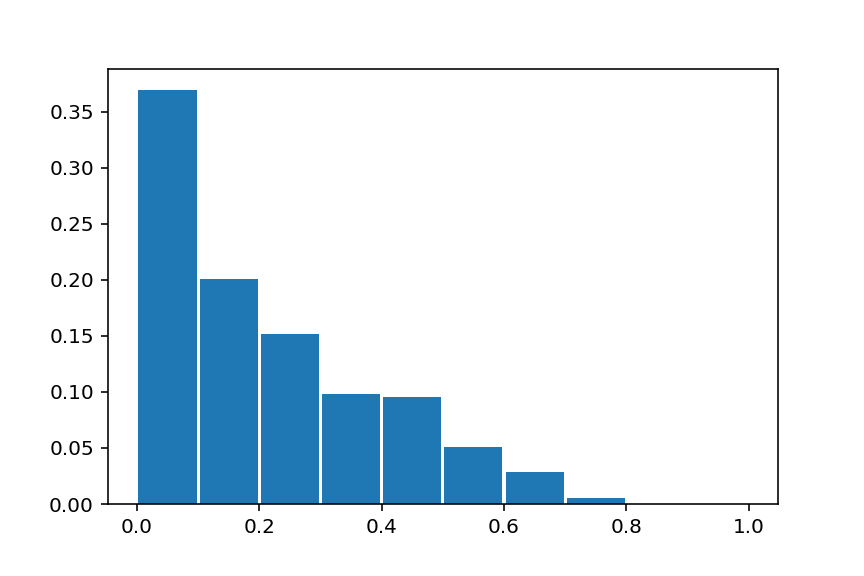

In [106]:
y_pred = model.predict(x)
errors = list(map(lambda y_t, y_p: abs(y_t - y_p), y_true, y_pred.flatten().tolist()))
# Error bins.
print("\nThe percentage of data which are in the follow bins:")
data_percentages, bins = nn.error_bins_data_percentage(errors, 10, (0.0, 1.0))
for i in range(len(data_percentages)):
	print("[{:.2f}-{:.2f}]: {:.3%}".format(bins[i], bins[i+1], data_percentages[i]))

width = 0.95 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, data_percentages, align='center', width=width)
plt.show()